# V2

用随机森林

在V1的基础上缩减特征

V2.0 30个

得分：0.14881

排名：2518

V2.1 15个

得分：0.15586

排名：2518

In [1]:
import pickle

import numpy as np

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

from sklearn import cross_validation, metrics
from sklearn.metrics import classification_report

from sklearn.grid_search import GridSearchCV 

import pandas as pd

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data_train,data_test = pickle.load(open("./datas_clean_V1.ggy","rb"))

data_train.head()

,SalePrices,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1,60,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,181500,2,20,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,223500,3,60,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,140000,4,70,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,250000,5,60,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
def showColums():
    
    print('+'*20)
    
    print(data_train.columns.values.tolist())
    print('-'*20)
    print(data_test.columns.values.tolist())

    print('+'*20)
    
    data_train.info()
    print('-'*20)
    data_test.info()
    
    print('+'*20)
    
showColums()

++++++++++++++++++++
['SalePrices', 'Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighb

In [4]:
calc_v1 = pickle.load(open("./calc_V1.ggy","rb"))
print(calc_v1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)


In [5]:
names = data_train.columns.values.tolist()[2:]

results = pd.DataFrame({"ColName":names,"value":calc_v1.feature_importances_})

results.head()

,ColName,value
0,MSSubClass,0.001367
1,LotArea,0.013232
2,OverallQual,0.594742
3,OverallCond,0.004294
4,YearBuilt,0.009903


In [6]:
results =results.sort_values("value",ascending =False)

columns = results["ColName"].values[:15]
print(columns)

results.head(10)

['OverallQual' 'GrLivArea' '2ndFlrSF' 'TotalBsmtSF' 'BsmtFinSF1'
 '1stFlrSF' 'GarageCars' 'GarageArea' 'LotArea' 'YearBuilt' 'FullBath'
 'YearRemodAdd' 'TotRmsAbvGrd' 'WoodDeckSF' 'MasVnrArea']


,ColName,value
2,OverallQual,0.594742
13,GrLivArea,0.107347
12,2ndFlrSF,0.039352
10,TotalBsmtSF,0.039222
7,BsmtFinSF1,0.026742
11,1stFlrSF,0.023245
23,GarageCars,0.014537
24,GarageArea,0.013316
1,LotArea,0.013232
4,YearBuilt,0.009903


In [7]:
from sklearn import cross_validation

split_train, split_cv = cross_validation.train_test_split(data_train, test_size=0.3, random_state=0)

# y即Survival结果
y = split_train["SalePrices"].values

# X即特征属性值
X = split_train[columns].values

print(X.shape,y.shape)


# y即Survival结果
y_v = split_cv["SalePrices"].values

# X即特征属性值
X_v = split_cv[columns].values

print(X_v.shape,y_v.shape)
#print(split_cv.info())

(1022, 15) (1022,)
(438, 15) (438,)


In [8]:
def showModelAbility(rf,X=X,y=y):
    
    y_pred = rf.predict(X)

    print(y)
    print(y_pred)

    print('score',rf.score(X,y) )
    print('oob_score_',rf.oob_score_)

    print('R^2',metrics.r2_score(y,y_pred) )
    print('均方误差',metrics.mean_squared_error(y,y_pred) )
    print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation, metrics

rf0 = RandomForestRegressor(oob_score=True, random_state=10)  
rf0.fit(X,y)  


showModelAbility(rf0)

[219500 173000 116500 ... 112000 234000 221000]
[230600. 168850. 121350. ... 132375. 219650. 212629.]
score 0.9683727820694036
oob_score_ 0.7223066847200494
R^2 0.9683727820694036
均方误差 192918318.95132095
平均绝对误差 8358.906164383561


D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [10]:
from sklearn.grid_search import GridSearchCV 


#首先对n_estimators进行网格搜索  
param_test1= {'n_estimators':list(range(10,201,10))}  
gsearch1= GridSearchCV(estimator = RandomForestRegressor(oob_score=True,random_state=10),  
                       param_grid =param_test1,cv=5)  
gsearch1.fit(X,y)  
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_ 

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

([mean: 0.81310, std: 0.03859, params: {'n_estimators': 10},
  mean: 0.82942, std: 0.04305, params: {'n_estimators': 20},
  mean: 0.83423, std: 0.04395, params: {'n_estimators': 30},
  mean: 0.83212, std: 0.04895, params: {'n_estimators': 40},
  mean: 0.83808, std: 0.04426, params: {'n_estimators': 50},
  mean: 0.83602, std: 0.04654, params: {'n_estimators': 60},
  mean: 0.83582, std: 0.04878, params: {'n_estimators': 70},
  mean: 0.83923, std: 0.04617, params: {'n_estimators': 80},
  mean: 0.83874, std: 0.04488, params: {'n_estimators': 90},
  mean: 0.83978, std: 0.04529, params: {'n_estimators': 100},
  mean: 0.84154, std: 0.04514, params: {'n_estimators': 110},
  mean: 0.84133, std: 0.04307, params: {'n_estimators': 120},
  mean: 0.84155, std: 0.04234, params: {'n_estimators': 130},
  mean: 0.84165, std: 0.04199, params: {'n_estimators': 140},
  mean: 0.84187, std: 0.04157, params: {'n_estimators': 150},
  mean: 0.84308, std: 0.04051, params: {'n_estimators': 160},
  mean: 0.84267, 

In [11]:
best_n_estimators = gsearch1.best_params_["n_estimators"]

param_test2= {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(5,50,5))}  
gsearch2= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,oob_score=True,random_state=10),  
   param_grid = param_test2,iid=False, cv=5)  
gsearch2.fit(X,y)  
gsearch2.grid_scores_,gsearch2.best_params_, gsearch2.best_score_ 

([mean: 0.75530, std: 0.02845, params: {'max_depth': 3, 'min_samples_split': 5},
  mean: 0.75607, std: 0.02697, params: {'max_depth': 3, 'min_samples_split': 10},
  mean: 0.75571, std: 0.02725, params: {'max_depth': 3, 'min_samples_split': 15},
  mean: 0.75529, std: 0.02497, params: {'max_depth': 3, 'min_samples_split': 20},
  mean: 0.75434, std: 0.02446, params: {'max_depth': 3, 'min_samples_split': 25},
  mean: 0.75331, std: 0.02453, params: {'max_depth': 3, 'min_samples_split': 30},
  mean: 0.75282, std: 0.02432, params: {'max_depth': 3, 'min_samples_split': 35},
  mean: 0.75208, std: 0.02386, params: {'max_depth': 3, 'min_samples_split': 40},
  mean: 0.75112, std: 0.02374, params: {'max_depth': 3, 'min_samples_split': 45},
  mean: 0.81600, std: 0.03793, params: {'max_depth': 5, 'min_samples_split': 5},
  mean: 0.81769, std: 0.03197, params: {'max_depth': 5, 'min_samples_split': 10},
  mean: 0.81775, std: 0.02814, params: {'max_depth': 5, 'min_samples_split': 15},
  mean: 0.81534, s

In [12]:
best_max_depth = gsearch2.best_params_["max_depth"]
best_min_samples_split = gsearch2.best_params_["min_samples_split"]

rf1= RandomForestRegressor(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            oob_score=True,random_state=10)  
rf1.fit(X,y)  

tempRf = rf1

y_pred = tempRf.predict(X)

print(y)
print(y_pred)

print('score',tempRf.score(X,y) )
print('oob_score_',tempRf.oob_score_)

print('R^2',metrics.r2_score(y,y_pred) )
print('均方误差',metrics.mean_squared_error(y,y_pred) )
print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

[219500 173000 116500 ... 112000 234000 221000]
[225457.20044052 170240.6076413  118470.68266254 ... 134559.75836155
 216104.99418029 221578.3232955 ]
score 0.9717945776768113
oob_score_ 0.8457662299973335
R^2 0.9717945776768113
均方误差 172046199.9484824
平均绝对误差 8096.203812309263


In [13]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参 
param_test3= {'min_samples_split':list(range(2,40,5)), 'min_samples_leaf':list(range(2,40,5))}  
gsearch3= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth,oob_score=True, random_state=10),  
   param_grid = param_test3,iid=False, cv=5)  
gsearch3.fit(X,y)  
gsearch3.grid_scores_,gsearch3.best_params_, gsearch3.best_score_ 

([mean: 0.83742, std: 0.04108, params: {'min_samples_leaf': 2, 'min_samples_split': 2},
  mean: 0.83834, std: 0.03651, params: {'min_samples_leaf': 2, 'min_samples_split': 7},
  mean: 0.83668, std: 0.03269, params: {'min_samples_leaf': 2, 'min_samples_split': 12},
  mean: 0.83433, std: 0.03138, params: {'min_samples_leaf': 2, 'min_samples_split': 17},
  mean: 0.83035, std: 0.02927, params: {'min_samples_leaf': 2, 'min_samples_split': 22},
  mean: 0.82516, std: 0.02944, params: {'min_samples_leaf': 2, 'min_samples_split': 27},
  mean: 0.82020, std: 0.02915, params: {'min_samples_leaf': 2, 'min_samples_split': 32},
  mean: 0.81486, std: 0.02852, params: {'min_samples_leaf': 2, 'min_samples_split': 37},
  mean: 0.83785, std: 0.03130, params: {'min_samples_leaf': 7, 'min_samples_split': 2},
  mean: 0.83785, std: 0.03130, params: {'min_samples_leaf': 7, 'min_samples_split': 7},
  mean: 0.83785, std: 0.03130, params: {'min_samples_leaf': 7, 'min_samples_split': 12},
  mean: 0.83518, std: 0.0

In [14]:
best_min_samples_leaf = gsearch3.best_params_["min_samples_leaf"]
best_min_samples_split = gsearch3.best_params_["min_samples_split"]

#最后我们再对最大特征数max_features做调参:  
param_test4= {'max_features':list(range(3,int(15*2/3),3))}  
gsearch4= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth, 
                                                          min_samples_split=best_min_samples_split,  
                                                          min_samples_leaf=best_min_samples_leaf ,
                                                          oob_score=True, random_state=10),  
                                                       param_grid = param_test4,iid=False, cv=5)  
gsearch4.fit(X,y)  
gsearch4.grid_scores_,gsearch4.best_params_, gsearch4.best_score_ 

([mean: 0.84219, std: 0.03056, params: {'max_features': 3},
  mean: 0.84375, std: 0.03336, params: {'max_features': 6},
  mean: 0.84322, std: 0.03401, params: {'max_features': 9}],
 {'max_features': 6},
 0.8437496016846235)

In [16]:
best_max_features = gsearch4.best_params_["max_features"]

#用我们搜索到的最佳参数，我们再看看最终的模型拟合：  
rf2= RandomForestRegressor(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,  
                            min_samples_leaf=best_min_samples_leaf,
                            max_features=best_max_features ,
                            oob_score=True, random_state=10)  
rf2.fit(X,y) 

tempRf = rf2

y_pred = tempRf.predict(X)

print(y)
print(y_pred)

print('score',tempRf.score(X,y) )
print('oob_score_',tempRf.oob_score_)

print('R^2',metrics.r2_score(y,y_pred) )
print('均方误差',metrics.mean_squared_error(y,y_pred) )
print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

[219500 173000 116500 ... 112000 234000 221000]
[230835.96247042 170966.15719967 114455.36235993 ... 144917.72414015
 209630.641849   219749.3649758 ]
score 0.9504356129366965
oob_score_ 0.8501178793363305
R^2 0.9504356129366964
均方误差 302330677.7437063
平均绝对误差 10160.627152902576


In [17]:
for rf in [rf0,rf1,rf2]:
    tempRf = rf

    y_pred = tempRf.predict(X)

    print(y)
    print(y_pred)

    print('score',tempRf.score(X,y) )
    print('oob_score_',tempRf.oob_score_)

    print('R^2',metrics.r2_score(y,y_pred) )
    print('均方误差',metrics.mean_squared_error(y,y_pred) )
    print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )
    
    print('-'*20)

[219500 173000 116500 ... 112000 234000 221000]
[230600. 168850. 121350. ... 132375. 219650. 212629.]
score 0.9683727820694036
oob_score_ 0.7223066847200494
R^2 0.9683727820694036
均方误差 192918318.95132095
平均绝对误差 8358.906164383561
--------------------
[219500 173000 116500 ... 112000 234000 221000]
[225457.20044052 170240.6076413  118470.68266254 ... 134559.75836155
 216104.99418029 221578.3232955 ]
score 0.9717945776768113
oob_score_ 0.8457662299973335
R^2 0.9717945776768113
均方误差 172046199.9484824
平均绝对误差 8096.203812309263
--------------------
[219500 173000 116500 ... 112000 234000 221000]
[230835.96247042 170966.15719967 114455.36235993 ... 144917.72414015
 209630.641849   219749.3649758 ]
score 0.9504356129366965
oob_score_ 0.8501178793363305
R^2 0.9504356129366964
均方误差 302330677.7437063
平均绝对误差 10160.627152902576
--------------------


In [18]:
import copy
rf_final = copy.copy(rf1)

In [19]:
#train_all = data_train.values

# y即Survival结果
y_all = data_train["SalePrices"].values

# X即特征属性值
X_all = data_train[columns].values

print(X_all.shape)

(1460, 15)


In [20]:
rf_final.fit(X_all,y_all)  

showModelAbility(rf_final,X_all,y_all)

print (rf_final)

[208500 181500 223500 ... 266500 142125 147500]
[203995.19457543 173134.79070551 221503.20134739 ... 261041.28234716
 133715.66596817 149949.88692257]
score 0.973358155239426
oob_score_ 0.8567075445798584
R^2 0.9733581552394259
均方误差 168024482.4286368
平均绝对误差 8062.684486813389
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)


In [21]:
names = columns

results = pd.DataFrame({"ColName":names,"value":rf_final.feature_importances_})

results.head()

,ColName,value
0,OverallQual,0.610355
1,GrLivArea,0.114756
2,2ndFlrSF,0.043081
3,TotalBsmtSF,0.046731
4,BsmtFinSF1,0.035266


In [22]:
results =results.sort_values("value",ascending =False)
results.head(30)

,ColName,value
0,OverallQual,0.610355
1,GrLivArea,0.114756
3,TotalBsmtSF,0.046731
2,2ndFlrSF,0.043081
4,BsmtFinSF1,0.035266
5,1stFlrSF,0.028246
8,LotArea,0.021707
7,GarageArea,0.019549
9,YearBuilt,0.018137
6,GarageCars,0.017304


D:\Anaconda2\envs\python36\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


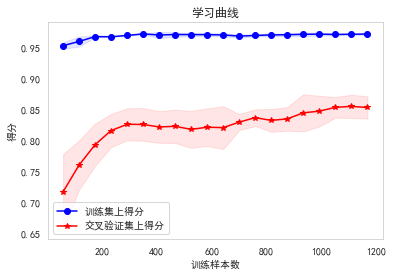

In [23]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline


from sklearn.learning_curve import learning_curve


# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if True:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, '*-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.gca().invert_yaxis()
        plt.draw()
        plt.show()
        

    #midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    #diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    #return midpoint, diff


plot_learning_curve(rf_final, u"学习曲线", X_all, y_all,cv=5)

In [ ]:
#过拟合了

In [24]:
#空值检查
for data,name in zip(data_test.isnull().sum(),names):
    print(data,name)

0 OverallQual
0 GrLivArea
0 2ndFlrSF
0 TotalBsmtSF
0 BsmtFinSF1
0 1stFlrSF
0 GarageCars
0 GarageArea
0 LotArea
0 YearBuilt
0 FullBath
0 YearRemodAdd
0 TotRmsAbvGrd
0 WoodDeckSF
0 MasVnrArea


In [25]:
data_test.info()

ids = data_test.values[:,0].astype(np.int32)

X_test = data_test[columns].values

print(X_test.shape)


y_pred = rf_final.predict(X_test)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 259 entries, Id to SaleCondition_Partial
dtypes: float64(10), int64(21), uint8(228)
memory usage: 689.6 KB
(1459, 15)


In [26]:
resluts = pd.DataFrame({"Id":ids,"SalePrice":y_pred})

resluts.head()

,Id,SalePrice
0,1461,124394.180539
1,1462,158218.419602
2,1463,185542.460705
3,1464,184037.403023
4,1465,197400.835742


In [27]:
print(resluts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int32
SalePrice    1459 non-null float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB
None


In [28]:
resluts.to_csv('Result_V2.1_V1.csv', index=False)

In [29]:
import pickle


pickle.dump(rf_final,open("./calc_V2.1.ggy","wb"))